## Linear Fit - Sensor

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import cho_factor, cho_solve
plt.style.use('classic')

In [2]:
# Literature data

A = np.array([[1, 38.03131991051457],
             [1, 158.83668903803135],
             [1, 328.85906040268463],
             [1, 438.4787472035795],
             [1, 570.4697986577182],
             [1, 906.0402684563761]
             ])

d = np.array([[0.2866972477064227],
             [0.8830275229357802],
             [1.5481651376146792],
             [2.144495412844037],
             [2.729357798165138],
             [4.438073394495413]
             ])

b = (4/3)*np.pi*d

In [3]:
B = np.transpose(A) @ A
y = np.transpose(A) @ b

In [4]:
L, low = cho_factor(B)

In [5]:
x = cho_solve((L, low), y)

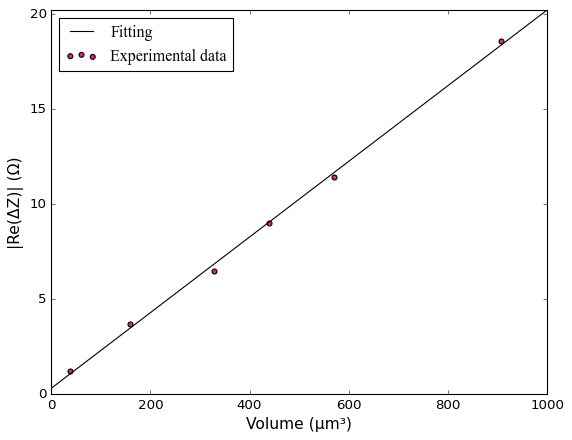

In [6]:
X_arange = np.arange(0, 1000, 1)

Y_arange = x[0] + x[1]*X_arange

# Create a Matplotlib figure with a transparent background
fig, ax = plt.subplots()
fig.patch.set_facecolor('none')  # Set the background color to transparent

# Set the font family to Times New Roman for various text elements
plt.rcParams['font.family'] = 'Times New Roman'
ax.set_xlabel('Volume (μm³)', fontsize=14)
ax.set_ylabel('|Re(ΔZ)| (Ω)', fontsize=14)

# Plot your data
ax.scatter(A[:, 1], b, label='Experimental data', c='#E02189')

# Plot your data
ax.plot(X_arange, Y_arange, label='Fitting', c='black')

# Add limits
ax.set_xlim(0, 1000)
ax.set_ylim(0, x[0] + x[1]*1000)

# Add legend
ax.legend(loc='upper left')

#ax.grid()

plt.savefig('mps_size_fit.png', dpi=600)

# Show the plot
plt.show()